In [1]:
import glob
import json

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fn, fs = [], []
for file in glob.glob('../source/*.json'):
    with open(file) as fd:
        fn.append(file)
        fs.append(json.load(fd))

df = pd.concat([pd.json_normalize(f) for f in fs])

In [3]:
df.head()

,count,date,status,text
0,1,2021-01-02,False,rabbit hits merrily adorable
0,2,2021-01-01,True,rabbit jumps crazily adorable
0,3,2021-01-01,True,dog runs occasionally clueless
0,4,2021-01-01,True,rabbit jumps crazily adorable
0,5,2021-01-01,True,puppy jumps occasionally clueless


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   2229 non-null   int64 
 1   date    2229 non-null   object
 2   status  2229 non-null   bool  
 3   text    2229 non-null   object
dtypes: bool(1), int64(1), object(2)
memory usage: 71.8+ KB


None

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['year'] = df['date'].dt.year
df['week'] = df['date'].dt.isocalendar().week
df.head()

,count,date,status,text,year,week
0,1,2021-01-02,False,rabbit hits merrily adorable,2021,53
0,2,2021-01-01,True,rabbit jumps crazily adorable,2021,53
0,3,2021-01-01,True,dog runs occasionally clueless,2021,53
0,4,2021-01-01,True,rabbit jumps crazily adorable,2021,53
0,5,2021-01-01,True,puppy jumps occasionally clueless,2021,53


In [7]:
years = sorted(df.year.unique())
counts = [df[df.year == year].year.count() for year in years]
print(years)
print(counts)

[2021, 2022, 2023]
[906, 935, 388]


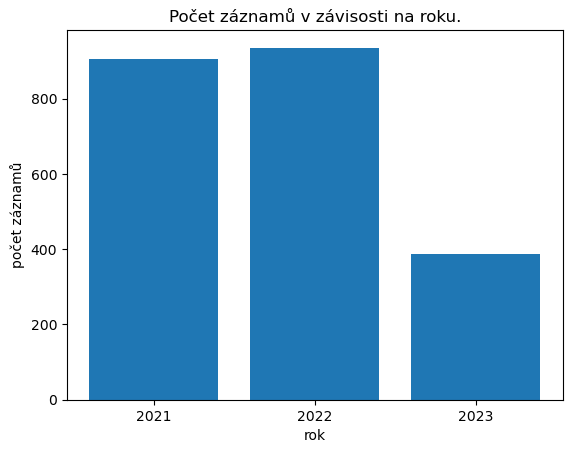

In [8]:
fig, ax = plt.subplots()
ax.bar(years, counts)
ax.set_title("Počet záznamů v závisosti na roku.")
ax.set_xticks(years)
ax.set_xlabel('rok')
ax.set_ylabel('počet záznamů')
plt.show()

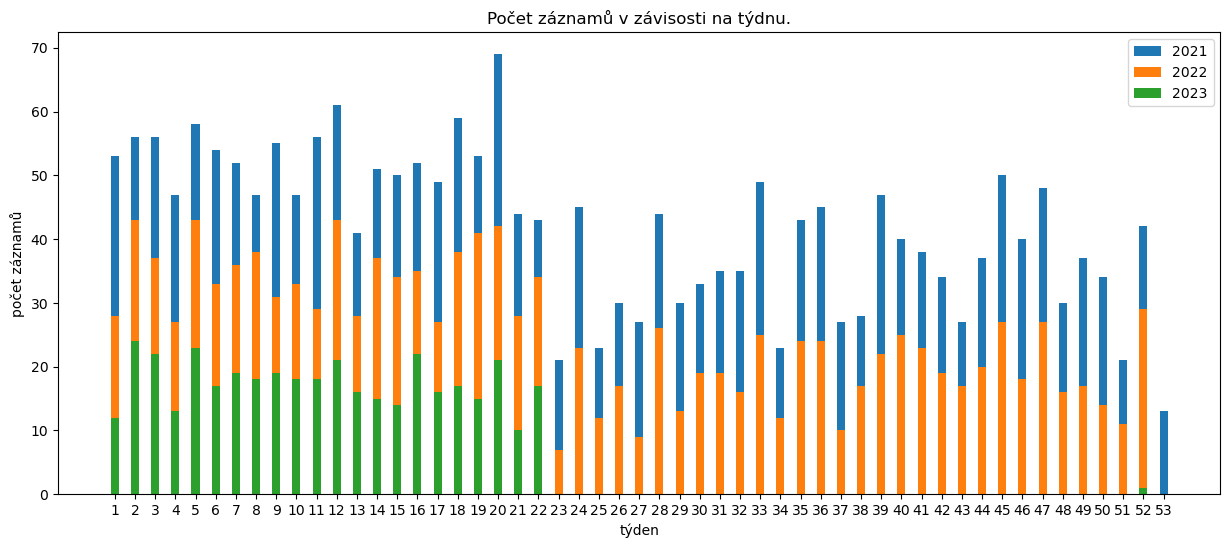

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
width = 0.4
weeks = sorted(df.week.unique())
total_counts = [df[df.week == week].week.count() for week in weeks]
for year in years[0:3]:
    ax.bar(weeks, total_counts, width, label=str(year))
    counts = [df[(df.year == year) & (df.week == week)].week.count() for week in weeks]
    for i in range(len(total_counts)):
        total_counts[i] -= counts[i]


ax.set_title("Počet záznamů v závisosti na týdnu.")
ax.set_xticks(weeks)
ax.set_xlabel('týden')
ax.set_ylabel('počet záznamů')
ax.legend()
plt.show()

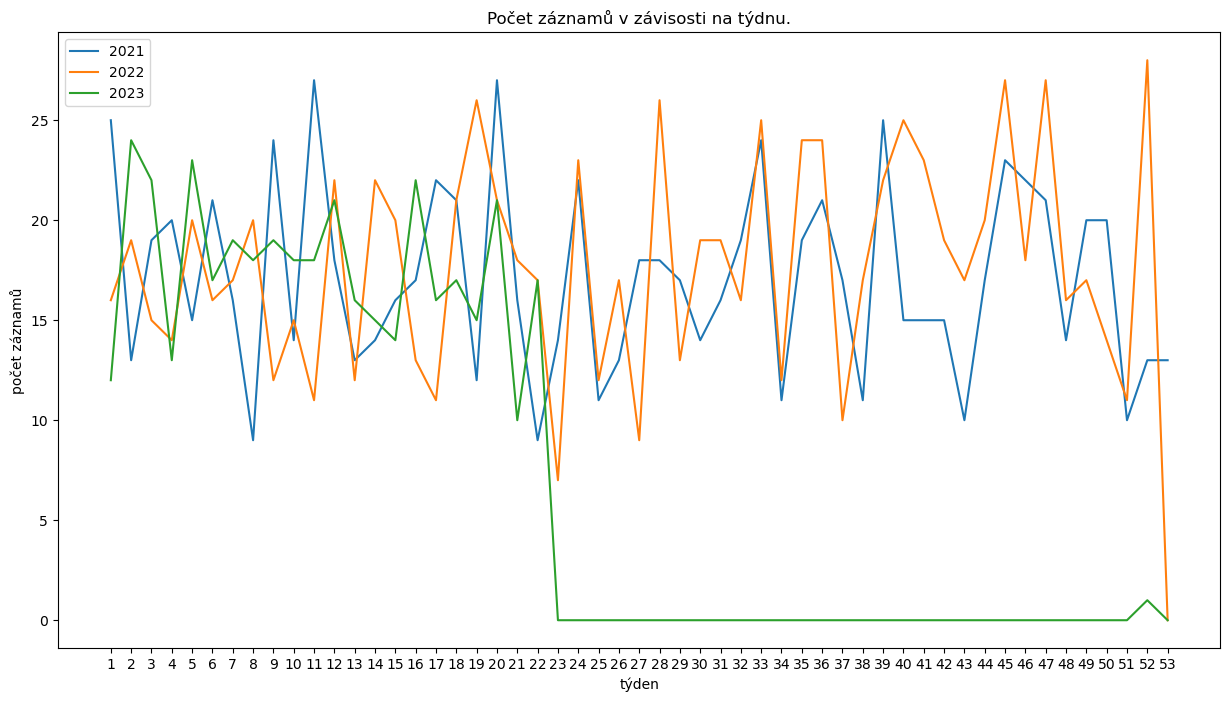

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
for year in years:
    weeks = sorted(df.week.unique())
    counts = [df[(df.year == year) & (df.week == week)].week.count() for week in weeks]
    ax.plot(weeks, counts, label=str(year))

ax.set_title("Počet záznamů v závisosti na týdnu.")
ax.set_xticks(weeks)
ax.set_xlabel('týden')
ax.set_ylabel('počet záznamů')
ax.legend()
plt.show()

In [11]:
df['text_length'] = df.text.apply(len)
df.head()

,count,date,status,text,year,week,text_length
0,1,2021-01-02,False,rabbit hits merrily adorable,2021,53,28
0,2,2021-01-01,True,rabbit jumps crazily adorable,2021,53,29
0,3,2021-01-01,True,dog runs occasionally clueless,2021,53,30
0,4,2021-01-01,True,rabbit jumps crazily adorable,2021,53,29
0,5,2021-01-01,True,puppy jumps occasionally clueless,2021,53,33


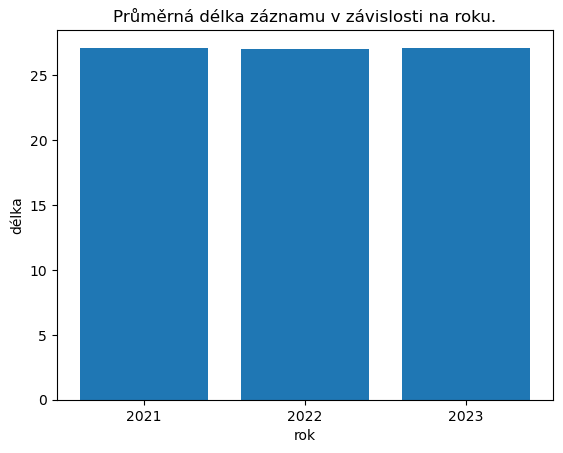

In [12]:
fig, ax = plt.subplots()
av_lengths = [df[df.year == year].text_length.mean() for year in years]
ax.bar(years, av_lengths)
ax.set_title("Průměrná délka záznamu v závislosti na roku.")
ax.set_xticks(years)
ax.set_xlabel('rok')
ax.set_ylabel('délka')
plt.show()


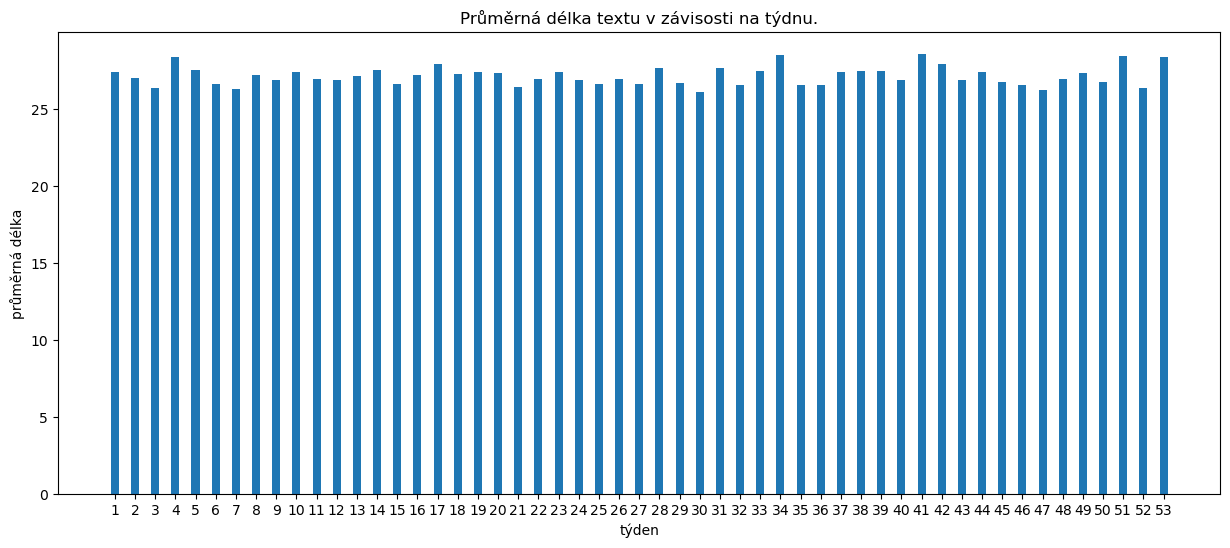

In [13]:
fig, ax = plt.subplots(figsize=(15,6))
width = 0.4
weeks = sorted(df.week.unique())
averages = [df[df.week == week].text_length.mean() for week in weeks]
ax.bar(weeks, averages, width)



ax.set_title("Průměrná délka textu v závisosti na týdnu.")
ax.set_xticks(weeks)
ax.set_xlabel('týden')
ax.set_ylabel('průměrná délka')
plt.show()

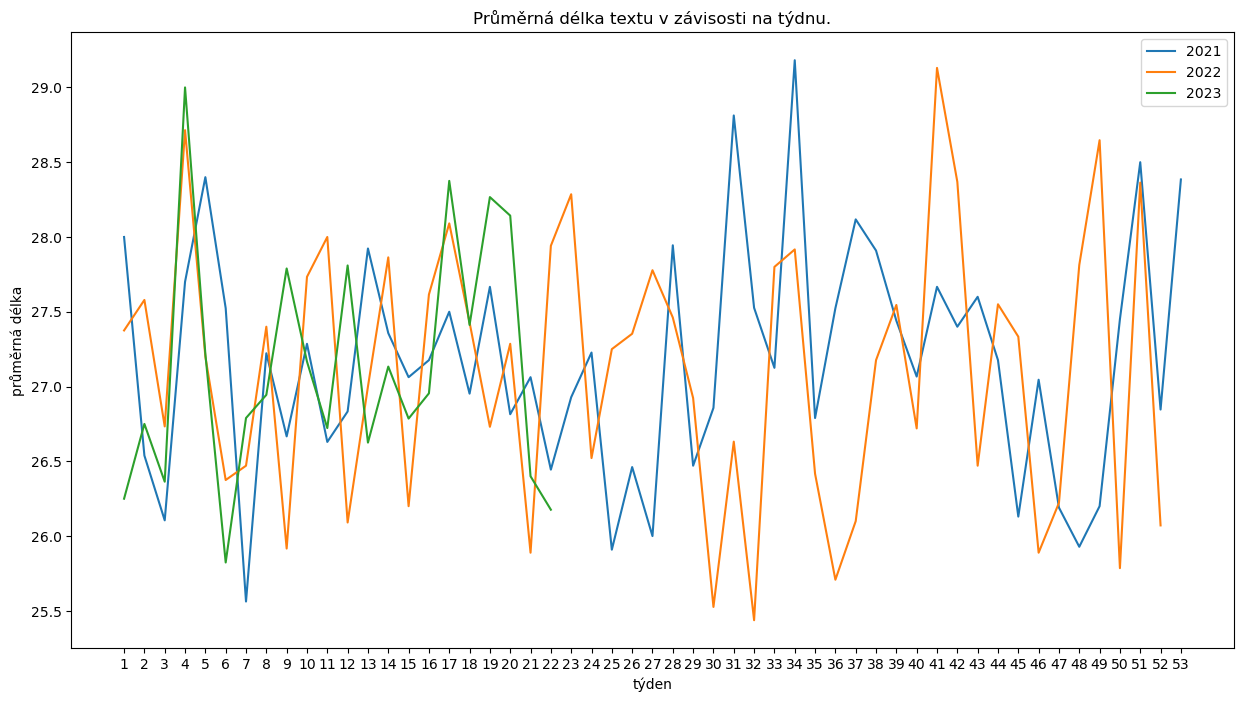

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
for year in years:
    weeks = sorted(df.week.unique())
    lengths = [df[(df.year == year) & (df.week == week)].text_length.mean() for week in weeks]
    ax.plot(weeks, lengths, label=str(year))

ax.set_title("Průměrná délka textu v závisosti na týdnu.")
ax.set_xticks(weeks)
ax.set_xlabel('týden')
ax.set_ylabel('průměrná délka')
ax.legend()
plt.show()